<a href="https://colab.research.google.com/github/curiosityr0ver/Machine-Learning-Intro/blob/main/AutoSalesPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv("car_sales_missing_extended.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
 data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
 data = data.dropna(subset=["Price"])
 data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
#Converting categorical data to numerical data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

categ_features = ["Make", "Colour"]
categ_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy = "constant", fill_value="missing"), 
                                       ("onehot", OneHotEncoder(handle_unknown = "ignore")))])
door_features = ["Doors"]
door_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy="constant", fill_value = 4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy = "mean" ))])

#Preprocessing values and converting categories to numbers

preprocessor = ColumnTransformer(
    transformers = [("cat", categ_transformer, categ_features), 
                    ("Doors",door_transformer ,door_features),
                    ("num", numeric_transformer, numeric_features)
                    ])

#Creating a pre-processing and modelling pipeline

model = Pipeline(steps=[("preprocessor", preprocessor), ("model", RandomForestRegressor())])

In [ ]:
 data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

<ipython-input-69-daa0a12b3a8a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([4,7,10000], [2,3,58889], 'bo', linestyle="--", color = "black")
<ipython-input-69-daa0a12b3a8a>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([2000,5,1000], [12,9,5889], 'bo', linestyle="--", color = "grey")


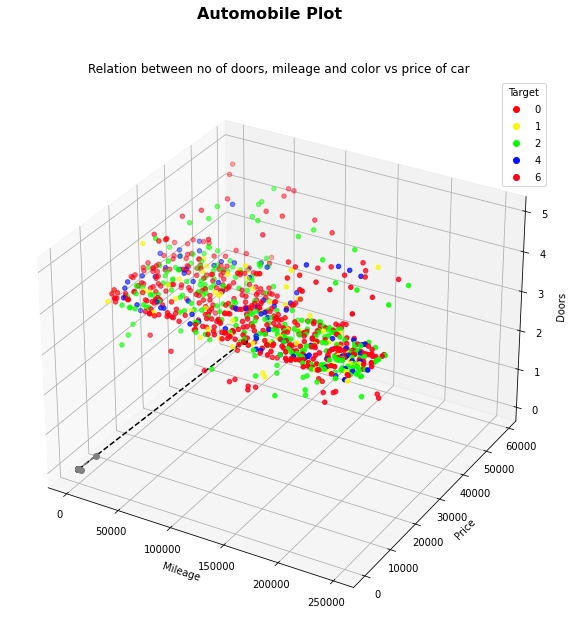

In [ ]:
#Plotting

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

plt.plot([4,7,10000], [2,3,58889], 'bo', linestyle="--", color = "black")
plt.plot([2000,5,1000], [12,9,5889], 'bo', linestyle="--", color = "grey")

# For each set of style and range settings, plot n random poRedints in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    x = data["Odometer (KM)"]
    y = data["Price"]
    z = data["Doors"]
    c = [None] * len(data)
    for i in range(0, len(data)):
      
      if(data.iloc[i][1] == "Red"):
         c[i] = 0
      elif(data.iloc[i][1] == "Green"):
         c[i] = 1
      elif(data.iloc[i][1] == "Blue"):
         c[i] = 2
      elif(data.iloc[i][1] == "Blue"):
         c[i] = 3
      elif(data.iloc[i][1] == "Black"):
         c[i] = 4
      elif(data.iloc[i][1] == "Yellow"):
         c[i] = 5
      else:
        c[i] = 6

my_cmap = plt.get_cmap('hsv')
f1= ax.scatter(x, y, z, c=c, cmap = my_cmap)
ax.set(title="Relation between no of doors, mileage and color vs price of car", xlabel="Mileage", ylabel = "Price", zlabel = "Doors");
ax.legend(*f1.legend_elements(), title="Target", fancybox=True)
ax.axhline(data["Odometer (KM)"].mean(), linestyle= "dashed")
fig.suptitle("Automobile Plot", fontsize = 16, fontweight = "bold");

In [ ]:
# model.fit(x_train, y_train)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

data['Make'].fillna("Generic", inplace = True)
data['Colour'].fillna("Missing", inplace = True)
data['Colour'].replace(['White', 'Black', 'Blue', 'Red','Green','Missing'], [0,1,2,3,4,5], inplace=True)
data['Make'].replace(['Honda', 'Toyota', 'Nissan', 'BMW', 'Generic'], [0,1,2,3,4], inplace=True)
data['Odometer (KM)'].fillna(data['Odometer (KM)'].median(), inplace = True)
data['Doors'].fillna(4, inplace = True)

data.isna().sum()


/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
X = data.drop("Price", axis = 1)
Y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
x_train.isna().sum()
clf.fit(x_train, y_train);
clf.score(x_test, y_test)

0.22143173612030376